# Project 3: Airline Delay and Cancellation

## Annie Dale
### Introduction to Data Science (St. Edward's University, Spring 2024)
**Goal:** Explore trends surrounding airline flight arrivals and departures. With these trends in mind, employ and compare three machine learning models to predict flight arrival status (early, ontime, delayed).

**Data (Download Available From):** https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis
*  Note: For this project, I used the CSV files from 2016, 2017, and 2018. I randomly subsetted 10,000 rows of data from each year and created a new CSV file. Each row represents a unique flight.

The aim of this notebook is to demonstrate my machine learning coding capabilities and comprehension. For this project, I looked into flight arrival time since as passengers we usually care greater about getting to our destination ontime or early. I categorized flight arrival status as "early" if the arr_delay time was less than -5 minutes. The flight was categorized as "delayed" if the arr_delay was greater than 5 minutes. Finally, the flight was categorized as "ontime" if the arr_delay was in between -5 to +5 minutes.

This notebook is split up into three sections: data processing, exploratory data analysis, and machine learning.

## Data Processing
**Goal:** Set up airline flight data to be explored and modeled.

**Steps:**
1.  Import packages
2.  Load in subsetted data
3.  Rename and restructure columns
4.  Categorize and label encode both arrival and departure status

In [163]:
# load packages
import pandas as pd
import numpy as np

In [164]:
# load data
df = pd.read_csv('airline_30k.csv')

In [165]:
# view column names
df.columns

Index(['Unnamed: 0', 'FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'Unnamed: 27'],
      dtype='object')

In [166]:
# drop uninformative columns
df = df.drop(columns=['Unnamed: 0','OP_CARRIER_FL_NUM', 'Unnamed: 27'], axis=1)

In [167]:
# transform columns to be lowercase
df.columns = map(str.lower, df.columns)

In [168]:
# rename columns for usability
df = df.rename(columns={'fl_date':'date', 'op_carrier':'airline'})
# transform date to datetime object
df['date'] = pd.to_datetime(df['date'])

In [169]:
# display dataframe with restructured columns
pd.set_option('display.max_columns', None)
df.head()

,date,airline,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,UA,IAD,EWR,1717,1738.0,21.0,23.0,1801.0,1837.0,6.0,1845,1843.0,-2.0,0.0,NaN,0.0,88.0,65.0,36.0,212.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,MIA,ORD,1226,1217.0,-9.0,16.0,1233.0,1421.0,3.0,1448,1424.0,-24.0,0.0,NaN,0.0,202.0,187.0,168.0,1197.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,AS,IAH,SEA,1925,1947.0,22.0,15.0,2002.0,2228.0,10.0,2225,2238.0,13.0,0.0,NaN,0.0,300.0,291.0,266.0,1874.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,EV,DFW,BHM,1250,1322.0,32.0,14.0,1336.0,1448.0,13.0,1433,1501.0,28.0,0.0,NaN,0.0,103.0,99.0,72.0,597.0,0.0,0.0,0.0,0.0,28.0
4,2018-01-01,EV,EWR,PVD,1103,1058.0,-5.0,14.0,1112.0,1145.0,8.0,1213,1153.0,-20.0,0.0,NaN,0.0,70.0,55.0,33.0,160.0,NaN,NaN,NaN,NaN,NaN


### Categorized and Label Encoded arrival delay and departure delay time

Label encoding converts categorical data into numerical data, which is compatible with ML models (DT classifiers, Random Forest)
*   On-time classification is within 5 minutes of scheduled arrival/departure time
*   Early classification is when the flight arrived more than 5 minutes early
*   Delayed classification is when the flight arrived more than 5 minutes late

In [170]:
# initialize new columns
df['dep_status'] = np.nan
df['arr_status'] = np.nan
df['dep_status'] = df['dep_status'].astype('string')
df['arr_status'] = df['arr_status'].astype('string')

In [171]:
# create departure status labels
df.loc[df['dep_delay']<-5, 'dep_status'] = 'early'
df.loc[df['dep_delay']>5, 'dep_status'] = 'delay'
df.loc[(df['dep_delay']>=-5) & (df['dep_delay']<=5), 'dep_status'] ='ontime'

In [172]:
# create arrival status labels
df.loc[df['arr_delay']<-5, 'arr_status'] = 'early'
df.loc[df['arr_delay']>5, 'arr_status'] = 'delay'
df.loc[(df['arr_delay']>=-5) & (df['arr_delay']<=5), 'arr_status'] ='ontime'

In [173]:
# view number of flights that fall into each category
df['dep_status'].value_counts()

dep_status
ontime    15152
delay      7574
early      6827
Name: count, dtype: Int64

In [174]:
df['arr_status'].value_counts()

arr_status
early     15004
delay      7918
ontime     6573
Name: count, dtype: Int64

In [175]:
# view dataframe with new category columns
df.head()

,date,airline,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_status,arr_status
0,2018-01-01,UA,IAD,EWR,1717,1738.0,21.0,23.0,1801.0,1837.0,6.0,1845,1843.0,-2.0,0.0,NaN,0.0,88.0,65.0,36.0,212.0,NaN,NaN,NaN,NaN,NaN,delay,ontime
1,2018-01-01,UA,MIA,ORD,1226,1217.0,-9.0,16.0,1233.0,1421.0,3.0,1448,1424.0,-24.0,0.0,NaN,0.0,202.0,187.0,168.0,1197.0,NaN,NaN,NaN,NaN,NaN,early,early
2,2018-01-01,AS,IAH,SEA,1925,1947.0,22.0,15.0,2002.0,2228.0,10.0,2225,2238.0,13.0,0.0,NaN,0.0,300.0,291.0,266.0,1874.0,NaN,NaN,NaN,NaN,NaN,delay,delay
3,2018-01-01,EV,DFW,BHM,1250,1322.0,32.0,14.0,1336.0,1448.0,13.0,1433,1501.0,28.0,0.0,NaN,0.0,103.0,99.0,72.0,597.0,0.0,0.0,0.0,0.0,28.0,delay,delay
4,2018-01-01,EV,EWR,PVD,1103,1058.0,-5.0,14.0,1112.0,1145.0,8.0,1213,1153.0,-20.0,0.0,NaN,0.0,70.0,55.0,33.0,160.0,NaN,NaN,NaN,NaN,NaN,ontime,early


In [176]:
# investigate NA values
df['dep_status'].isna().sum()

447

In [177]:
df['arr_status'].isna().sum()

505

In [178]:
# drop NA values
df = df.dropna(subset=['dep_status', 'arr_status'])
df = df.copy() # make sure it is a real copy of the df and not diminished because of subsetting

In [179]:
# load LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [180]:
# label encode the departure and arrival status
dep_le = LabelEncoder()
df['dep_status_label'] = dep_le.fit_transform(df['dep_status'])

arr_le = LabelEncoder()
df['arr_status_label'] = arr_le.fit_transform(df['arr_status'])

Made it so 0 = delay; 1 = early; 2 = ontime

In [181]:
# view dataframe with label encoded columns
df.head()

,date,airline,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_status,arr_status,dep_status_label,arr_status_label
0,2018-01-01,UA,IAD,EWR,1717,1738.0,21.0,23.0,1801.0,1837.0,6.0,1845,1843.0,-2.0,0.0,NaN,0.0,88.0,65.0,36.0,212.0,NaN,NaN,NaN,NaN,NaN,delay,ontime,0,2
1,2018-01-01,UA,MIA,ORD,1226,1217.0,-9.0,16.0,1233.0,1421.0,3.0,1448,1424.0,-24.0,0.0,NaN,0.0,202.0,187.0,168.0,1197.0,NaN,NaN,NaN,NaN,NaN,early,early,1,1
2,2018-01-01,AS,IAH,SEA,1925,1947.0,22.0,15.0,2002.0,2228.0,10.0,2225,2238.0,13.0,0.0,NaN,0.0,300.0,291.0,266.0,1874.0,NaN,NaN,NaN,NaN,NaN,delay,delay,0,0
3,2018-01-01,EV,DFW,BHM,1250,1322.0,32.0,14.0,1336.0,1448.0,13.0,1433,1501.0,28.0,0.0,NaN,0.0,103.0,99.0,72.0,597.0,0.0,0.0,0.0,0.0,28.0,delay,delay,0,0
4,2018-01-01,EV,EWR,PVD,1103,1058.0,-5.0,14.0,1112.0,1145.0,8.0,1213,1153.0,-20.0,0.0,NaN,0.0,70.0,55.0,33.0,160.0,NaN,NaN,NaN,NaN,NaN,ontime,early,2,1


In [182]:
# extract month from date to use as a feature for ML models
df['month'] = df['date'].dt.month

## Exploratory Data Analysis
**Goal:** Explore features that might be indicative of flight arrival status

**Note:** In my original project, I explored more features, but reduced it for this sample.

**Explored Features:**

*   flight distance
*   scheduled departure time
*   total air time


In [183]:
# load packages
from matplotlib import pyplot as plt
import seaborn as sns

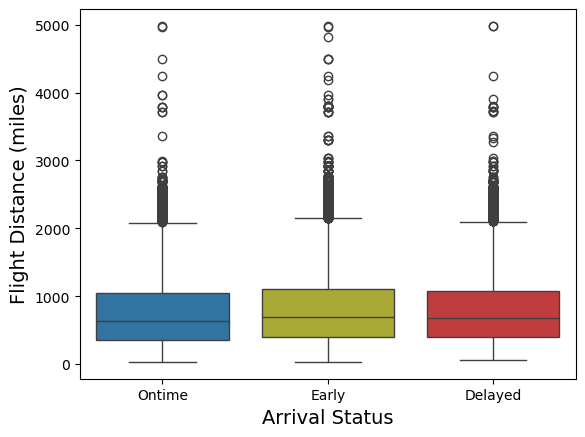

In [184]:
# visualize distribution and median flight distance grouped by arrival status

# create color palette
my_palette = {'ontime':'tab:blue', 'early':'tab:olive', 'delay':'tab:red'}

# boxplot visualization
sns.boxplot(x='arr_status', y='distance', data=df, hue='arr_status', palette=my_palette, legend=False)

# add labels and organize boxplot axes
plt.ylabel('Flight Distance (miles)', fontsize=14)
plt.xlabel('Arrival Status', fontsize=14)
plt.xticks([0,1,2], ['Ontime', 'Early', 'Delayed'])

# show plot
plt.show()

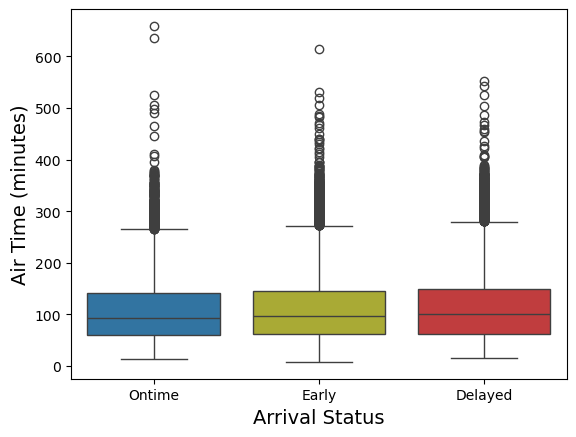

In [185]:
# visualize relationship between total time in the air and flight arrival status

sns.boxplot(x='arr_status', y='air_time', data=df, hue='arr_status', palette=my_palette, legend=False)

plt.ylabel('Air Time (minutes)', fontsize=14)
plt.xlabel('Arrival Status', fontsize=14)
plt.xticks([0,1,2], ['Ontime', 'Early', 'Delayed'])

plt.show()

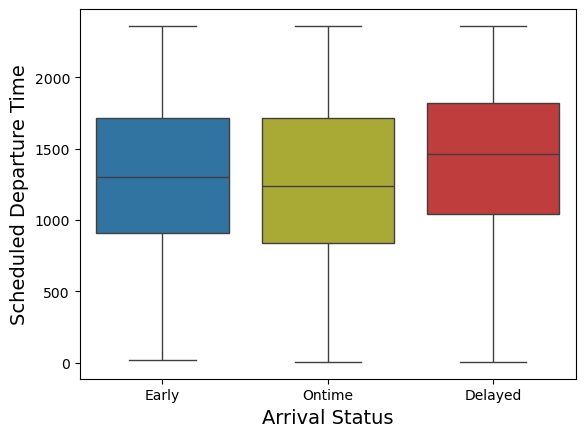

In [186]:
# visualize relationship between scheduled departure time and flight arrival status

sns.boxplot(x='arr_status', y='crs_dep_time', data=df, hue='arr_status', palette=my_palette, legend=False)

plt.ylabel('Scheduled Departure Time', fontsize=14)
plt.xlabel('Arrival Status', fontsize=14)
plt.xticks([0,1,2], ['Early', 'Ontime', 'Delayed'])

plt.show()

## Machine Learning Models

**Goal:** Apply three supervised machine learning models to predict flight arrival time (minutes delayed) and status. Then, ensemble the classifiers using Hard Voting to combine their predictions.

**Steps:**
1.  Identify features to use in each models (use the same features for each)
2.  Split the data into training and test sets
3.  Linear regression to predict minutes elapsed since expected arrival
4.  Logistic regression to predict flight arrival status
5.  Decision tree classifier to predict flight arrival status
6.  Hard Voting ensemble technique to predict flight arrival status using the logistic regression and DTC 

In [187]:
# look at potential features
df.columns

Index(['date', 'airline', 'origin', 'dest', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'dep_status', 'arr_status', 'dep_status_label', 'arr_status_label',
       'month'],
      dtype='object')

In [188]:
# view dataframe
df.head()

,date,airline,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dep_status,arr_status,dep_status_label,arr_status_label,month
0,2018-01-01,UA,IAD,EWR,1717,1738.0,21.0,23.0,1801.0,1837.0,6.0,1845,1843.0,-2.0,0.0,NaN,0.0,88.0,65.0,36.0,212.0,NaN,NaN,NaN,NaN,NaN,delay,ontime,0,2,1
1,2018-01-01,UA,MIA,ORD,1226,1217.0,-9.0,16.0,1233.0,1421.0,3.0,1448,1424.0,-24.0,0.0,NaN,0.0,202.0,187.0,168.0,1197.0,NaN,NaN,NaN,NaN,NaN,early,early,1,1,1
2,2018-01-01,AS,IAH,SEA,1925,1947.0,22.0,15.0,2002.0,2228.0,10.0,2225,2238.0,13.0,0.0,NaN,0.0,300.0,291.0,266.0,1874.0,NaN,NaN,NaN,NaN,NaN,delay,delay,0,0,1
3,2018-01-01,EV,DFW,BHM,1250,1322.0,32.0,14.0,1336.0,1448.0,13.0,1433,1501.0,28.0,0.0,NaN,0.0,103.0,99.0,72.0,597.0,0.0,0.0,0.0,0.0,28.0,delay,delay,0,0,1
4,2018-01-01,EV,EWR,PVD,1103,1058.0,-5.0,14.0,1112.0,1145.0,8.0,1213,1153.0,-20.0,0.0,NaN,0.0,70.0,55.0,33.0,160.0,NaN,NaN,NaN,NaN,NaN,ontime,early,2,1,1


In [189]:
# understand datatypes since classifiers prefer numerical values
df.dtypes

date                   datetime64[ns]
airline                        object
origin                         object
dest                           object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
wheels_off                    float64
wheels_on                     float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
cancelled                     float64
cancellation_code              object
diverted                      float64
crs_elapsed_time              float64
actual_elapsed_time           float64
air_time                      float64
distance                      float64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraft_delay           float64
dep_status  

In [190]:
# label encode essential object features
airline_le = LabelEncoder()
df['airline'] = airline_le.fit_transform(df['airline'])

origin_le = LabelEncoder()
df['origin'] = origin_le.fit_transform(df['origin'])

dest_le = LabelEncoder()
df['dest'] = dest_le.fit_transform(df['dest'])

In [191]:
# load packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Linear Regression

In [192]:
# subset dataframe to columns of interest
linear_df = df[['arr_delay','cancelled','airline','origin','dest','crs_dep_time','dep_time','dep_delay','taxi_out','wheels_off','crs_arr_time','distance','month', 'arr_status', 'arr_status_label']]

In [193]:
# make sure to only keep flights that are NOT cancelled
linear_df = linear_df[linear_df['cancelled']!=1]

In [194]:
# ensure there are no NA values
linear_df.isna().sum()

arr_delay           0
cancelled           0
airline             0
origin              0
dest                0
crs_dep_time        0
dep_time            0
dep_delay           0
taxi_out            0
wheels_off          0
crs_arr_time        0
distance            0
month               0
arr_status          0
arr_status_label    0
dtype: int64

In [195]:
# understand the shape of the subsetted dataframe
linear_df.shape

(29482, 15)

In [196]:
# split the data fram so 30% of the data is in the test_df and 70% is in train_df
train_df, test_df = train_test_split(linear_df, test_size=0.3)

In [197]:
# specify features to use for EVERY ML model
cols_to_use = ['airline','origin','dest','crs_dep_time','dep_time','dep_delay','taxi_out','wheels_off','crs_arr_time','distance','month']

# train data is used to train our models - used to understand trends around arrial status
X_train = train_df[cols_to_use]
y_train = train_df['arr_delay']

# test data is used to test our models - used to make predictions
X_test = test_df[cols_to_use]
y_test = test_df['arr_delay']

In [198]:
# instantiate LinearRegression model
lr = LinearRegression()

# fit model
lr.fit(X_train,y_train)

LinearRegression()

In [199]:
# extract predictions
preds = lr.predict(X_test)

In [200]:
# visulize weights (importance) assigned to each feature included in the model
lr.coef_

array([ 1.46857002e-01,  3.86385528e-03,  3.67855772e-03, -7.79911247e-04,
       -4.44697751e-04,  9.95619662e-01,  7.79006038e-01,  9.02950134e-04,
       -1.76432757e-04, -3.21900012e-03,  1.38772902e-02])

In [201]:
# visualize the baseline prediction
# here we see most flights are predicted to arrive approx 18 minutes early
lr.intercept_

-17.28678932095253

Text(0, 0.5, 'Predicted Arrival Delay Time')

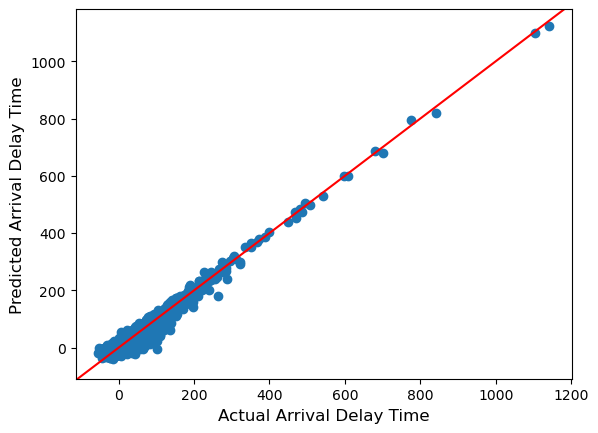

In [202]:
# relationship between actual arrival times and predicted arrival times
plt.scatter(y_test, preds)
plt.axline((-50,-50), slope=1, color='red') # line for reference
plt.xlabel('Actual Arrival Delay Time', fontsize=12)
plt.ylabel('Predicted Arrival Delay Time', fontsize=12)

(-50.0, 400.0)

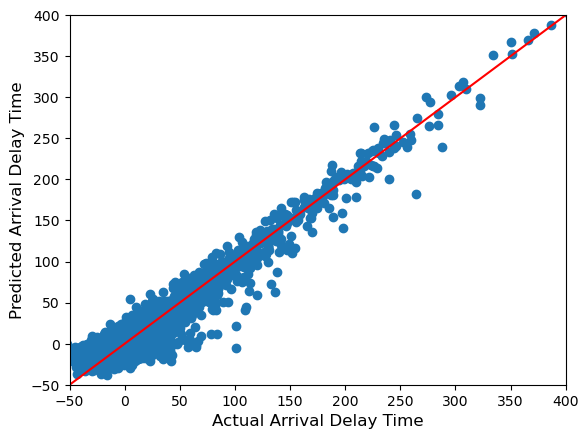

In [203]:
# zoomed-in scatter plot to focus on non-outlier looking predictions
plt.scatter(y_test, preds)
plt.axline((-50,-50), slope=1, color='red')
plt.xlabel('Actual Arrival Delay Time', fontsize=12)
plt.ylabel('Predicted Arrival Delay Time', fontsize=12)
plt.ylim((-50,400))
plt.xlim((-50,400))

In [204]:
# MSE = how far off prediciton is from true value
mse = mean_squared_error(y_test, preds)
# R-squared = how well the model explains the variance in arrival delay time
r2 = lr.score(X_test, y_test)

In [205]:
print('mean squared error: ', mse)
# relatively high MSE, but it is subjective
print('r2: ', r2)
# fairly strong R-squared value, indicates that our model fits fairly well

mean squared error:  121.59659638173727
r2:  0.9461557946912054


### Logistic Regression

In [206]:
# create copy of subsetted dataframe
logistic_df = linear_df.copy()

In [207]:
# create same test_df and train_df sizes
train_df, test_df = train_test_split(logistic_df, test_size=0.3)

In [208]:
# specify training features and dependent variable for test and training sets
X_train = train_df[cols_to_use]
y_train = train_df['arr_status']

X_test = test_df[cols_to_use]
y_test = test_df['arr_status']

In [209]:
# import logistic regression related packages
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [210]:
# normalize data to account for features with different units/ranges
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [211]:
# instantiate logistic regression model
clf = LogisticRegression(max_iter=1000)

In [212]:
# fit the logistic regression model and extract predictions
clf.fit(X_train_scaled, y_train)
test_pred = clf.predict(X_test_scaled)

In [213]:
# create method to print accuracy and confusion matrix
def logistic_info(pred, true, cols):
  print('Accuracy:', (accuracy_score(true, pred))*100,'%')
  cm = confusion_matrix(true, pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay.from_estimator(clf, cols, true, normalize='true')

Accuracy: 72.58338044092709 %


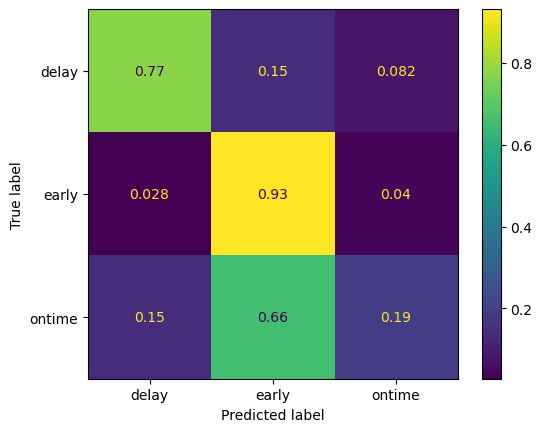

In [214]:
# visualize accuracy and confusion matrix
logistic_info(test_pred, y_test, X_test_scaled)

### Decision Tree Classifier

**Note:** Grid searches allow us to fine tune parameters of the DTC and prevent overfitting
*  min_samples_split: specifies how minimum samples required before a node can split further (flights that justify the split)
    *  nodes cannot contain less than this number of flights
*  max_depth: number of levels of node splits
*  min_samples_leaf: minimum number of samples a leaf node must contain
    *  good for imbalanced data (like this dataset, majority of flights are ontime)

In [215]:
# create copy of subsetted data
classifier_df = linear_df.copy()

In [216]:
# split up training and testing dataframes
train_df, test_df = train_test_split(classifier_df, test_size=0.3)

In [217]:
# split dataframes into features and dependent variable
X_train = train_df[cols_to_use]
y_train = train_df['arr_status_label']

X_test = test_df[cols_to_use]
y_test = test_df['arr_status_label']

In [218]:
# important packages relevant to DTC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [219]:
# parameter grid 1
hyperparam_grid1 = {'min_samples_split': [2, 10, 25, 50],
                    'max_depth': [2, 5, 10, 15],
                    'min_samples_leaf':[2, 10, 25, 50]}

In [220]:
# instantiate DTC
dtc = DecisionTreeClassifier()

In [221]:
# instantiate grid search
grid_search1 = GridSearchCV(dtc, hyperparam_grid1, n_jobs=-1)

In [222]:
# use each combination of parameters for the training data
grid_search1.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15],
                         'min_samples_leaf': [2, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 50]})

In [223]:
# extract the best parameters
grid_search1.best_params_

{'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 2}

In [224]:
# parameter grid 2
dt_clf = DecisionTreeClassifier()

hyperparam_grid2 = {'min_samples_leaf': [50,60,75,90,125,150],
                  'max_depth': [7,8,9,10,11,12],
                  'min_samples_split': [5,7,10,12,15,17]}

grid_search2 = GridSearchCV(dt_clf, hyperparam_grid2, n_jobs=-1)

grid_search2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [50, 60, 75, 90, 125, 150],
                         'min_samples_split': [5, 7, 10, 12, 15, 17]})

In [225]:
grid_search2.best_params_

{'max_depth': 7, 'min_samples_leaf': 150, 'min_samples_split': 5}

In [226]:
# parameter grid 3
dtclf = DecisionTreeClassifier()

hyperparam_grid3 = {'min_samples_leaf': [70,73,75,77,80],
                  'max_depth': [8],
                  'min_samples_split': [6,7,8,9]}

grid_search3 = GridSearchCV(dtclf, hyperparam_grid3, n_jobs=-1)

grid_search3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8],
                         'min_samples_leaf': [70, 73, 75, 77, 80],
                         'min_samples_split': [6, 7, 8, 9]})

In [227]:
grid_search3.best_params_

{'max_depth': 8, 'min_samples_leaf': 80, 'min_samples_split': 6}

In [228]:
# parameter grid 4
dtclf = DecisionTreeClassifier()

hyperparam_grid4 = {'min_samples_leaf': [65,66,67,68,69,70,72],
                  'max_depth': [8],
                  'min_samples_split': [7]}

grid_search4 = GridSearchCV(dtclf, hyperparam_grid4, n_jobs=-1)

grid_search4.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8],
                         'min_samples_leaf': [65, 66, 67, 68, 69, 70, 72],
                         'min_samples_split': [7]})

In [229]:
grid_search4.best_params_

{'max_depth': 8, 'min_samples_leaf': 72, 'min_samples_split': 7}

In [230]:
# instantiate DTC with our best parameters found from the grid searches
dt_clf = DecisionTreeClassifier(max_depth=8, min_samples_split=7, min_samples_leaf=67)
# fit the DTC
dt_clf.fit(X_train, y_train)
# extract predictions
preds = dt_clf.predict(X_test)

In [231]:
# print calculated accuracy of this DTC
print('acurracy:', dt_clf.score(X_test, y_test))

acurracy: 0.7235726399095535


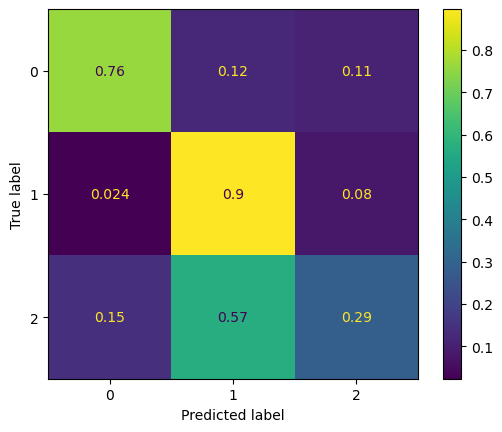

In [232]:
# display confusion matrix
# 2 = ontime
# 1 = early
# 0 = delayed
ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test, normalize='true')

In [233]:
# import packages related to visualizing the DTC
from sklearn import tree
from sklearn.tree import plot_tree

[Text(0.6751785714285714, 0.9444444444444444, 'x[5] <= 9.5\ngini = 0.618\nsamples = 20637\nvalue = [5505, 10542, 4590]'),
 Text(0.4689285714285714, 0.8333333333333334, 'x[6] <= 20.5\ngini = 0.516\nsamples = 16209\nvalue = [1781, 10374, 4054]'),
 Text(0.27035714285714285, 0.7222222222222222, 'x[5] <= -0.5\ngini = 0.435\nsamples = 12783\nvalue = [770, 9141, 2872]'),
 Text(0.15071428571428572, 0.6111111111111112, 'x[5] <= -4.5\ngini = 0.35\nsamples = 9857\nvalue = [386, 7747, 1724]'),
 Text(0.07714285714285714, 0.5, 'x[6] <= 15.5\ngini = 0.271\nsamples = 5012\nvalue = [152, 4229, 631]'),
 Text(0.045714285714285714, 0.3888888888888889, 'x[5] <= -6.5\ngini = 0.225\nsamples = 3575\nvalue = [89, 3125, 361]'),
 Text(0.022857142857142857, 0.2777777777777778, 'x[9] <= 679.5\ngini = 0.188\nsamples = 1933\nvalue = [49, 1735, 149]'),
 Text(0.011428571428571429, 0.16666666666666666, 'x[5] <= -7.5\ngini = 0.141\nsamples = 1094\nvalue = [17, 1012, 65]'),
 Text(0.005714285714285714, 0.05555555555555555

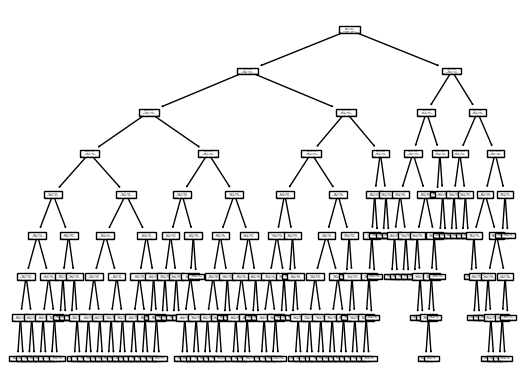

In [234]:
# allows us to visualize the complexity of the model
tree.plot_tree(dt_clf)

### Voting Ensemble

In [235]:
# import Voting Classifier ensemble model
from sklearn.ensemble import VotingClassifier

In [236]:
# instantiate the logistic regression and DTC
logistic_reg = LogisticRegression(max_iter=1000)
dtc = DecisionTreeClassifier(max_depth=8, min_samples_split=7, min_samples_leaf=67)

In [237]:
# instantiate and fit VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('logistic', logistic_reg),
    ('dtc', dtc)
], voting='hard')

# use scaled data because of the logistic regression
ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=1000)),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=67,
                                                     min_samples_split=7))])

In [238]:
# extract predictions
test_preds = ensemble.predict(X_test_scaled)

In [239]:
# print accuracy of this model
accuracy = accuracy_score(y_test, test_preds)
print('Ensemble Accuracy: ', accuracy)

Ensemble Accuracy:  0.49485585076314303
